# ACCESSING MACRO AND FACTORS DATA

### Initiating

In [126]:
# set up
import numpy as np
import pandas as pd
from functools import reduce
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
path = 'xxxxxxxxxxxxxxxxxxxxxx'

### Factors AQR

In [127]:
url_factors = "https://www.aqr.com/-/media/AQR/Documents/Insights/Data-Sets/Century-of-Factor-Premia-Monthly.xlsx"
url_bab = "https://www.aqr.com/-/media/AQR/Documents/Insights/Data-Sets/Betting-Against-Beta-Equity-Factors-Monthly.xlsx"
url_qmj = "https://www.aqr.com/-/media/AQR/Documents/Insights/Data-Sets/Quality-Minus-Junk-Factors-Monthly.xlsx"

In [128]:
df_factors = pd.read_excel(url_factors, sheet_name = 0, header = 18)
df_factors.rename(columns = str.lower, inplace = True)
df_factors.rename(columns = lambda x: x.strip().replace(" ", "_"), inplace=True)
df_factors.rename(columns = lambda x: x.strip().replace("-", "_"), inplace=True)
df_factors.rename(columns = {'unnamed:_0':'date'}, inplace = True)
df_factors['date'] = pd.to_datetime(pd.DataFrame({'day': 1, 
                                              'month': df_factors['date'].dt.month, 
                                              'year': df_factors['date'].dt.year},
                                              index=df_factors.index))
df_factors.set_index('date', inplace=True)

In [129]:
df_mkt = pd.read_excel(url_bab, sheet_name = 4, header = 18)
df_mkt.rename(columns = str.lower, inplace = True)
df_mkt.rename(columns = lambda x: x.strip().replace(" ", ""), inplace=True)
df_mkt['date'] = pd.to_datetime(df_mkt['date'], dayfirst=True)
df_mkt['date'] = pd.to_datetime(pd.DataFrame({'day': 1, 
                                              'month': df_mkt['date'].dt.month, 
                                              'year': df_mkt['date'].dt.year},
                                              index=df_mkt.index))
df_mkt.set_index('date', inplace=True)

In [130]:
df_size = pd.read_excel(url_bab, sheet_name = 5, header = 18)
df_size.rename(columns = str.lower, inplace = True)
df_size.rename(columns = lambda x: x.strip().replace(" ", "_"), inplace=True)
df_size['date'] = pd.to_datetime(df_size['date'], dayfirst = True)
df_size['date'] = pd.to_datetime(pd.DataFrame({'day': 1, 
                                              'month': df_size['date'].dt.month, 
                                              'year': df_size['date'].dt.year},
                                              index=df_size.index))
df_size.set_index('date', inplace=True)

In [131]:
df_value = pd.read_excel(url_bab, sheet_name = 6, header = 18)
df_value.rename(columns = str.lower, inplace = True)
df_value.rename(columns = lambda x: x.strip().replace(" ", "_"), inplace=True)
df_value['date'] = pd.to_datetime(df_value['date'], dayfirst=True)
df_value['date'] = pd.to_datetime(pd.DataFrame({'day': 1, 
                                              'month': df_value['date'].dt.month, 
                                              'year': df_value['date'].dt.year},
                                              index=df_value.index))
df_value.set_index('date', inplace=True)

In [132]:
df_mom = pd.read_excel(url_bab, sheet_name = 8, header = 18)
df_mom.rename(columns = str.lower, inplace = True)
df_mom.rename(columns = lambda x: x.strip().replace(" ", "_"), inplace=True)
df_mom['date'] = pd.to_datetime(df_mom['date'], dayfirst=True)
df_mom['date'] = pd.to_datetime(pd.DataFrame({'day': 1, 
                                              'month': df_mom['date'].dt.month, 
                                              'year': df_mom['date'].dt.year},
                                              index=df_mom.index))
df_mom.set_index('date', inplace=True)

In [133]:
df_bab = pd.read_excel(url_bab, sheet_name = 0, header = 18)
df_bab.rename(columns = str.lower, inplace = True)
df_bab.rename(columns = lambda x: x.strip().replace(" ", "_"), inplace=True)
df_bab['date'] = pd.to_datetime(df_bab['date'], dayfirst=True)
df_bab['date'] = pd.to_datetime(pd.DataFrame({'day': 1, 
                                              'month': df_bab['date'].dt.month, 
                                              'year': df_bab['date'].dt.year},
                                              index=df_bab.index))
df_bab.set_index('date', inplace=True)

In [134]:
df_qmj = pd.read_excel(url_qmj, sheet_name = 0 , header = 18)
df_qmj.rename(columns = str.lower, inplace = True)
df_qmj.rename(columns = lambda x: x.strip().replace(" ", "_"), inplace=True)
df_qmj['date'] = pd.to_datetime(df_qmj['date'], dayfirst=True)
df_qmj['date'] = pd.to_datetime(pd.DataFrame({'day': 1, 
                                              'month': df_qmj['date'].dt.month, 
                                              'year': df_qmj['date'].dt.year},
                                              index=df_qmj.index))
df_qmj.set_index('date', inplace=True)

In [135]:
dfs = [df_factors, df_mkt, df_size, df_value, df_mom, df_bab, df_qmj]
suffixes = ["", "_mkt", "_size", "_value", "_mom", "_bab", "_qmj"]
dfs = [dfs[i].add_suffix(suffixes[i]) for i in range(len(dfs))]
dfs = [dfs[i].rename(columns={f"date{suffixes[i]}":"date"}) for i in range(len(dfs))]
dfs = reduce(lambda left,right: pd.merge(left,right,how='outer', on='date'), dfs)

In [167]:
dfs

In [137]:
dfs.to_csv(path + 'factors_aqr.csv')

### FRED

In [138]:
url_fed = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=FEDFUNDS&scale=left&cosd=1954-07-01&coed=2022-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1954-07-01"
url_tbill3m = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=TB3MS&scale=left&cosd=1934-01-01&coed=2022-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1934-01-01"
url_us2y = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GS2&scale=left&cosd=1976-06-01&coed=2022-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1976-06-01"
url_us10y = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GS10&scale=left&cosd=1953-04-01&coed=2022-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1953-04-01"
url_usaaa = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=AAA&scale=left&cosd=1919-01-01&coed=2022-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1919-01-01"
url_usbbb = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=BAA&scale=left&cosd=1919-01-01&coed=2022-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1919-01-01"
url_beven10y = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=T10YIEM&scale=left&cosd=2003-01-01&coed=2022-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=2003-01-01"
url_cpi = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPIAUCNS&scale=left&cosd=1913-01-01&coed=2022-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1913-01-01"
url_cpiadj = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPILFENS&scale=left&cosd=1957-01-01&coed=2022-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1957-01-01"
url_gdpqoq = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=NA000334Q&scale=left&cosd=1947-01-01&coed=2022-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1947-01-01"
url_gdpg = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=A191RP1A027NBEA&scale=left&cosd=1930-01-01&coed=2021-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1930-01-01"
url_rgdpg = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=A191RL1A225NBEA&scale=left&cosd=1930-01-01&coed=2021-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1930-01-01"
url_rec = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=USREC&scale=left&cosd=1854-12-01&coed=2022-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1854-12-01"
url_recp = "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=RECPROUSM156N&scale=left&cosd=1967-06-01&coed=2022-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-09-18&revision_date=2022-09-18&nd=1967-06-01"

In [139]:
df_fed = pd.read_excel(url_fed, sheet_name = 0 , header = 10)
df_fed.rename(columns = {'observation_date':'date', 'FEDFUNDS':'fed_funds'}, inplace = True)
df_fed['fed_funds'] = df_fed['fed_funds'] / 100
df_fed.set_index('date', inplace=True)

In [140]:
df_tbill3m = pd.read_excel(url_tbill3m, sheet_name = 0 , header = 10)
df_tbill3m.rename(columns = {'observation_date':'date', 'TB3MS':'ustb3m'}, inplace = True)
df_tbill3m['ustb3m'] = df_tbill3m['ustb3m'] / 100
df_tbill3m.set_index('date', inplace=True)

In [141]:
df_us2y = pd.read_excel(url_us2y, sheet_name = 0 , header = 10)
df_us2y.rename(columns = {'observation_date':'date', 'GS2':'us2y'}, inplace = True)
df_us2y['us2y'] = df_us2y['us2y'] / 100
df_us2y.set_index('date', inplace=True)

In [142]:
df_us10y = pd.read_excel(url_us10y, sheet_name = 0 , header = 10)
df_us10y.rename(columns = {'observation_date':'date', 'GS10':'us10y'}, inplace = True)
df_us10y['us10y'] = df_us10y['us10y'] / 100
df_us10y.set_index('date', inplace=True)

In [143]:
df_usaaa = pd.read_excel(url_usaaa, sheet_name = 0 , header = 10)
df_usaaa.rename(columns = {'observation_date':'date', 'AAA':'us_aaa'}, inplace = True)
df_usaaa['us_aaa'] = df_usaaa['us_aaa'] / 100
df_usaaa.set_index('date', inplace=True)

In [144]:
df_usbbb = pd.read_excel(url_usbbb, sheet_name = 0 , header = 10)
df_usbbb.rename(columns = {'observation_date':'date', 'BAA':'us_bbb'}, inplace = True)
df_usbbb['us_bbb'] = df_usbbb['us_bbb'] / 100
df_usbbb.set_index('date', inplace=True)

In [145]:
df_beven10y = pd.read_excel(url_beven10y, sheet_name = 0 , header = 10)
df_beven10y.rename(columns = {'observation_date':'date', 'T10YIEM':'us_beven10y'}, inplace = True)
df_beven10y['us_beven10y'] = df_beven10y['us_beven10y'] / 100
df_beven10y.set_index('date', inplace=True)

In [146]:
df_cpi = pd.read_excel(url_cpi, sheet_name = 0 , header = 10)
df_cpi.rename(columns = {'observation_date':'date', 'CPIAUCNS':'us_cpi'}, inplace = True)
df_cpi['us_cpi_1m'] = df_cpi['us_cpi'].pct_change()
df_cpi['us_cpi_yoy'] = df_cpi['us_cpi'] / df_cpi['us_cpi'].shift(12) - 1
df_cpi.set_index('date', inplace=True)

In [147]:
df_cpiadj = pd.read_excel(url_cpiadj, sheet_name = 0 , header = 10)
df_cpiadj.rename(columns = {'observation_date':'date', 'CPILFENS':'us_cpiadj'}, inplace = True)
df_cpiadj['us_cpiadj_1m'] = df_cpiadj['us_cpiadj'].pct_change()
df_cpiadj['us_cpiadj_yoy'] = df_cpiadj['us_cpiadj'] / df_cpiadj['us_cpiadj'].shift(12) - 1
df_cpiadj.set_index('date', inplace=True)

In [148]:
df_gdpqoq = pd.read_excel(url_gdpqoq, sheet_name = 0 , header = 10)
df_gdpqoq.rename(columns = {'observation_date':'date', 'NA000334Q':'us_gdp'}, inplace = True)
df_gdpqoq['us_gdp_ttm'] = df_gdpqoq['us_gdp'].rolling(4, min_periods=4).sum()
df_gdpqoq['us_gdp_qoq'] = df_gdpqoq['us_gdp'].pct_change()
df_gdpqoq['us_gdp_yoy'] = df_gdpqoq['us_gdp_ttm'] / df_gdpqoq['us_gdp_ttm'].shift(4) - 1
df_gdpqoq.set_index('date', inplace=True)

In [149]:
df_gdpg = pd.read_excel(url_gdpg, sheet_name = 0 , header = 10)
df_gdpg.rename(columns = {'observation_date':'date', 'A191RP1A027NBEA':'us_gdpg'}, inplace = True)
df_gdpg['us_gdpg'] = df_gdpg['us_gdpg'] / 100
df_gdpg.set_index('date', inplace=True)

In [150]:
df_rgdpg = pd.read_excel(url_rgdpg, sheet_name = 0 , header = 10)
df_rgdpg.rename(columns = {'observation_date':'date', 'A191RL1A225NBEA':'us_rgdpg'}, inplace = True)
df_rgdpg['us_rgdpg'] = df_rgdpg['us_rgdpg'] / 100
df_rgdpg.set_index('date', inplace=True)

In [151]:
df_rec = pd.read_excel(url_rec, sheet_name = 0 , header = 10)
df_rec.rename(columns = {'observation_date':'date', 'USREC':'us_rec'}, inplace = True)
df_rec['date'] = pd.to_datetime(df_rec['date'])
df_rec['us_rec'] = df_rec['us_rec'].astype('bool')
df_rec.set_index('date', inplace=True)

In [152]:
df_recp = pd.read_excel(url_recp, sheet_name = 0 , header = 10)
df_recp.rename(columns = {'observation_date':'date', 'RECPROUSM156N':'us_recp'}, inplace = True)
df_recp.set_index('date', inplace=True)

In [153]:
df_fred = [df_fed, df_tbill3m, df_us2y, df_us10y, df_usaaa, df_usbbb, df_beven10y, df_cpi, df_cpiadj, df_gdpqoq, df_gdpg, df_rgdpg, df_rec, df_recp]
df_fred = reduce(lambda left,right: pd.merge(left,right,how='left', on='date'), df_fred)

In [156]:
df_fred

In [155]:
df_fred.to_csv(path + 'fred.csv')

### EDA

In [221]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly as py
import cufflinks as cf
import seaborn as sns
sns.set()
cf.set_config_file(offline=True)
import plotly.io as pio
pio.renderers.default = "svg"

In [169]:
cols = ['us_stock_selection_value', 'us_stock_selection_momentum', 'us_stock_selection_defensive', 
        'intl_stock_selection_value', 'intl_stock_selection_momentum', 'intl_stock_selection_defensive', 
        'fixed_income_value', 'fixed_income_momentum', 'fixed_income_carry', 'fixed_income_defensive', 
        'commodities_value', 'commodities_momentum', 'commodities_carry', 
        'equity_indices_market', 'fixed_income_market', 'commodities_market']

In [185]:
data = pd.DataFrame()
for col in cols:
    data[col] = dfs[col]

In [187]:
varl = ['us10y', 'us_beven10y', 'us_gdp_yoy', 'us_recp']
dfred = pd.DataFrame()
for var in varl:
    dfred[var] = df_fred[var]

In [205]:
dfred['us_gdp_yoy'].fillna(method='ffill', inplace=True)
dfred['us_recp'].fillna(method='ffill', inplace=True)

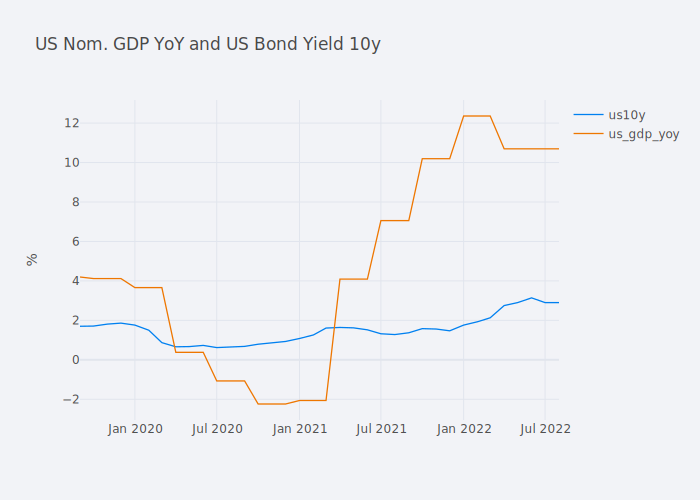

In [222]:
dfred[['us10y','us_gdp_yoy']][-36:].mul(100).iplot(asFigure=True, kind='lines', theme='polar', title='US Nom. GDP YoY and US Bond Yield 10y', yTitle='%')

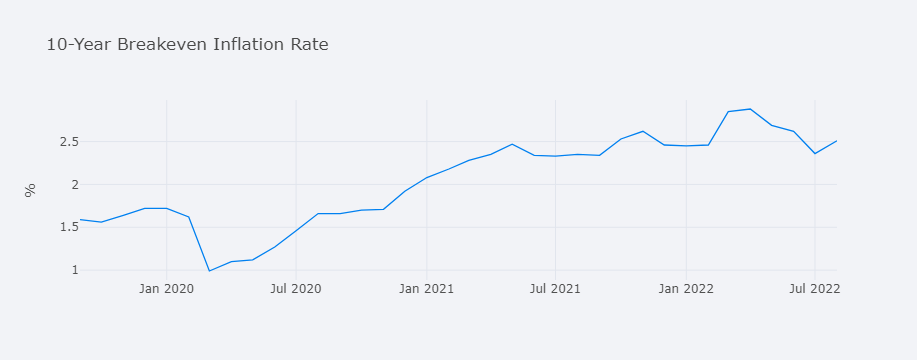

In [209]:
dfred['us_beven10y'][-36:].mul(100).iplot(kind='lines', theme='polar', title='10-Year Breakeven Inflation Rate', yTitle='%')

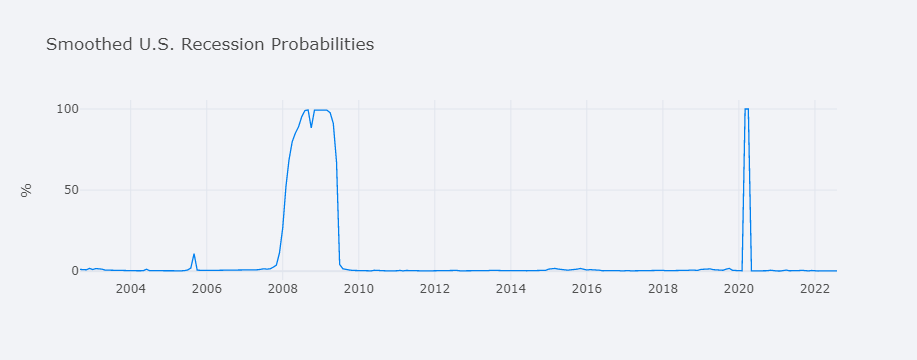

In [210]:
dfred['us_recp'][-240:].iplot(kind='lines', theme='polar', title='Smoothed U.S. Recession Probabilities', yTitle='%')

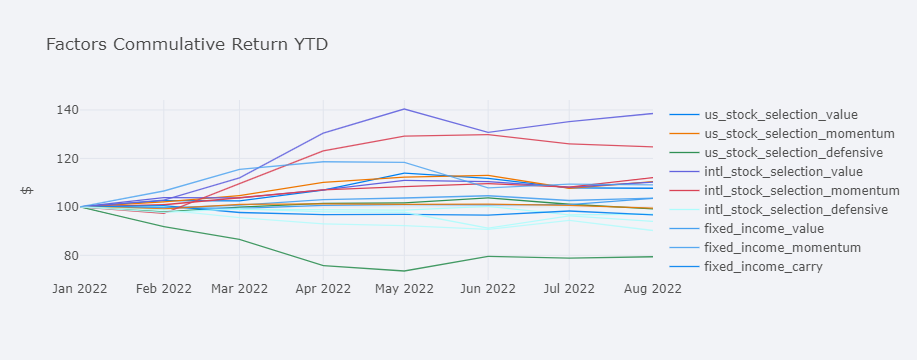

In [211]:
# what's working?
data[-8:].add(1).cumprod().mul(100).normalize().iplot(kind='lines', theme='polar', title='Factors Commulative Return YTD',  yTitle='$')

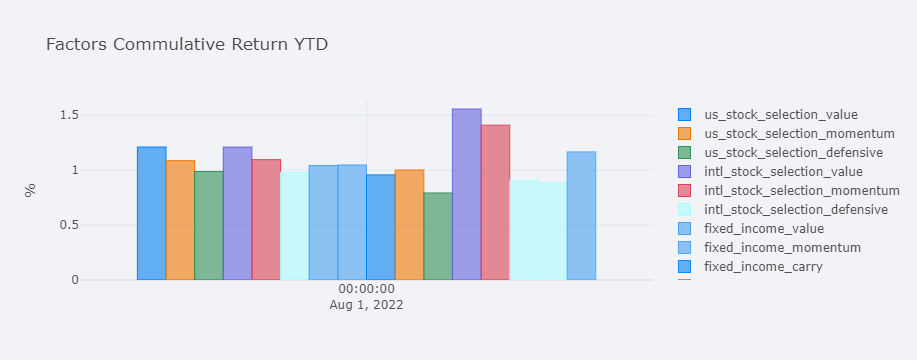

In [219]:
(data[-8:].add(1).cumprod())[-1:].iplot(kind='bar', theme='polar', title='Factors Commulative Return YTD',  yTitle='%')

<AxesSubplot:>

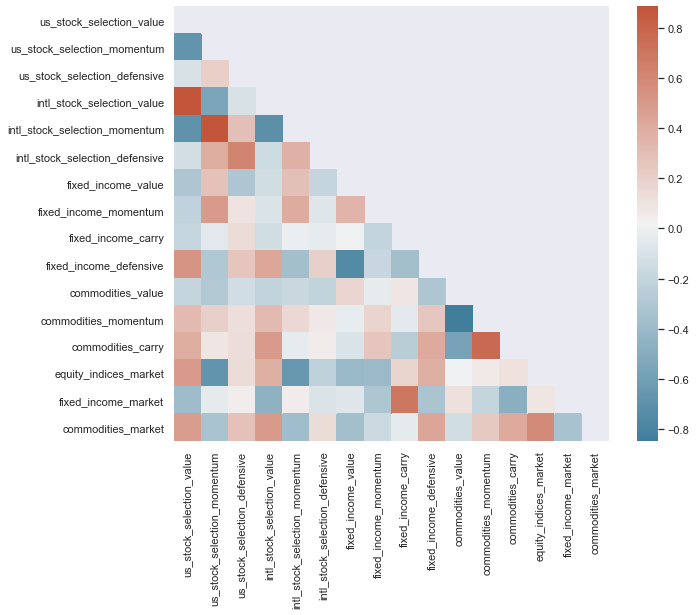

In [183]:
# corr within strats since covid-19 crisis
f, ax = plt.subplots(figsize=(10, 8))
corr = data[-36:].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, ax=ax)

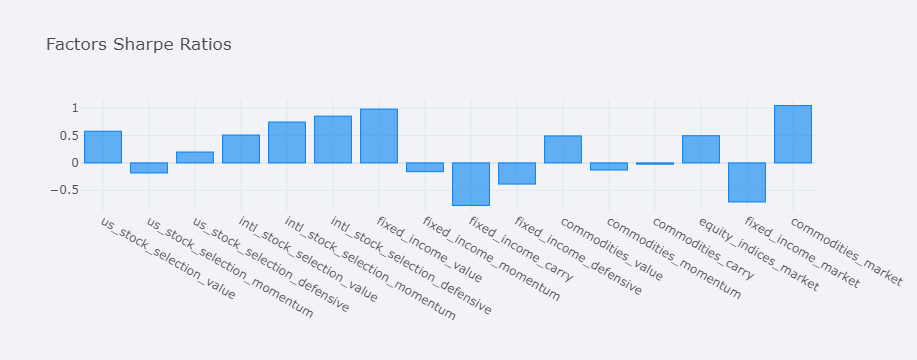

In [212]:
# sharpe ratios since covid-19 crisis
((data[-36:].mean() * 12 * 100) / (data[-36:].std() * math.sqrt(12) * 100)).iplot(kind='bar', theme='polar', title='Factors Sharpe Ratios')